In [1]:
import pandas as pd
import json

dfs = []

for i in range(1, 41):
    url = f"../data/people/people_{i}0.json"
    with open(url, 'r') as f:
        data = json.load(f)
        dfs.append(pd.read_json(json.dumps(data)))

df = pd.concat(dfs)

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.insert(0, '../')
from preprocessing.proc_utils import preprocess_data

In [25]:
df = preprocess_data(df)
df.shape

The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of integer type.
The series is already of 

(20648, 95)

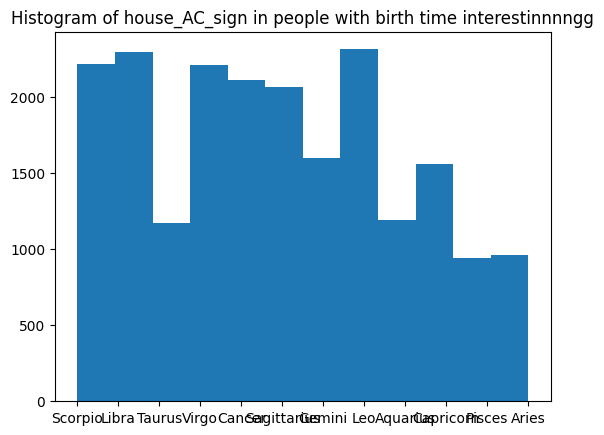

In [26]:
import matplotlib.pyplot as plt

def plot_histogram(df, series_id):
    plt.title(f'Histogram of {series_id} in people with birth time interestinnnngg')

    s_str = df[series_id].astype(str)
    plt.hist(s_str, bins=12)
    plt.show()

plot_histogram(df, "house_AC_sign")

In [22]:
df["occupation"].unique()

array(['politician', 'writer', 'writer, poet', ...,
       'Norwegian mass murderer',
       'actress, singer, director, dancer, screenwriter, lyricist',
       'comedian, actress'], dtype=object)

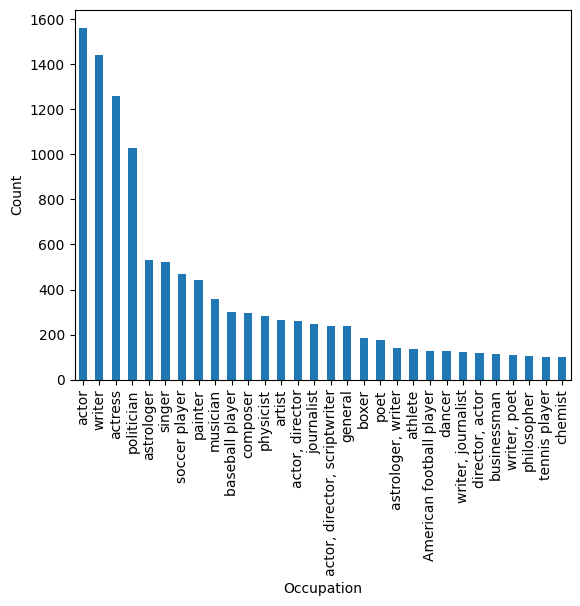

In [27]:
counts = df['occupation'].value_counts()

# Filter the results to exclude occupations with less than 10 counts
counts = counts[counts >= 100]

# Create a bar chart of the remaining occupations
counts.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')

# Show the plot
plt.show()

In [40]:
df['birth_year'] = df['birth_year'].astype(int)

In [47]:
mask = df['birth_year'] >= 1900
df_1900 = df[mask]
df_1900.shape

(16376, 95)

In [46]:
df.shape

(20648, 95)

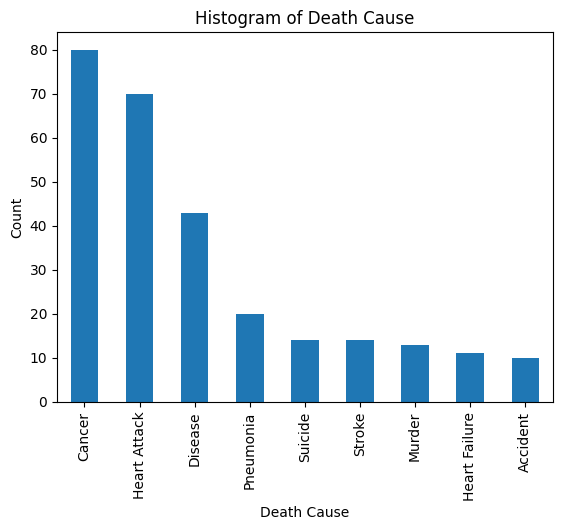

(1403, 95)


In [47]:


df.columns
mask = df['pluto_house'] == 12

subset = df[df['pluto_house'] == '12']
subset

counts = subset["death_cause"].value_counts()

counts = counts[counts >= 10]
# Create a bar chart of the causes of death
counts.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Death Cause')
plt.ylabel('Count')
plt.title('Histogram of Death Cause')

# Show the plot
plt.show()
subset.shape
print(subset.shape)